In [1]:
import sys, os
import numpy as np
import pandas as pd

sys.path.append('../')
from tools.mongo_analysis_tools import *
from tools.plots import get_dendro_heatmap, get_expression_hist
from tools.get_predictive_power import gene_predictive_accuracy

#import plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True) # run at the start of every ipython notebook

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [3]:
output = collect_run_output(14475, 21000, 'PAN_CANCER_regressor_TS', verbose=1)

All these experiments belong to experiment: PAN_CANCER_regressor_TS


In [4]:
runs_per_classifier(output)

,id,#runs
name,,
LinearSVR,"[14617, 14623, 14629, 14633, 14640, 14642, 146...",707
RandomForestRegressor,"[14475, 14488, 14526, 14572, 14606, 14652, 147...",182


For the label tumor_stage_float we have 7728 samples


/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



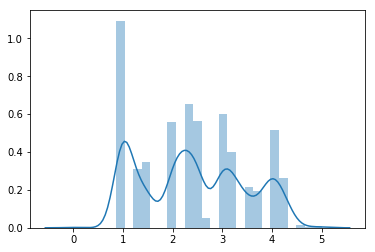

In [5]:
predict_label = output[0]['config']['predict_label']
data_latex(predict_label, regression=True)

In [6]:
selected_genes_ids, similarities = compute_gene_importance(output, similarity=10, latex=True)
similarities

\textbf{Gene analysis:}\\
The models selected have the following number of genes:\\
RandomForestRegressor: 5259\\
LinearSVR: 5956\\
Intersection: 1972\\


{'LinearSVR': [0.4616160764474513,
  0.2682645324347185,
  0.49330357142858045,
  0.4856549323451862,
  0.43915909345897686,
  0.6650765606596071,
  0.30103956511992885,
  0.5337031433854519,
  0.22147016011645476,
  0.5129421311842453],
 'RandomForestRegressor': [0.17666215257625673,
  0.5946765976655723,
  0.16900765322529,
  0.19280171860972298,
  0.049129353233830976,
  0.8910543436662842,
  0.15013663806800445,
  0.8925135049253267,
  0.1383818216390988,
  0.6009982886480334]}

In [7]:
latex_genes(selected_genes_ids)

These are the top 1972 genes in order of importance:\\
CNGB1$\text{\textbar}$1258, ARHGEF38$\text{\textbar}$54848, TH$\text{\textbar}$7054, GFRA3$\text{\textbar}$2676, WISP2$\text{\textbar}$8839, MYL1$\text{\textbar}$4632, DRP2$\text{\textbar}$1821, GLIS1$\text{\textbar}$148979, WBP2NL$\text{\textbar}$164684, CNTN2$\text{\textbar}$6900, CLEC9A$\text{\textbar}$283420, SHOX2$\text{\textbar}$6474, FAM83A$\text{\textbar}$84985, NRSN1$\text{\textbar}$140767, RTL4$\text{\textbar}$340595, DEGS2$\text{\textbar}$123099, CPA5$\text{\textbar}$93979, NAPSA$\text{\textbar}$9476, SERPIND1$\text{\textbar}$3053, FAM19A3$\text{\textbar}$284467, GRB14$\text{\textbar}$2888, CNMD$\text{\textbar}$11061, AP001931.1$\text{\textbar}$nan, CHGB$\text{\textbar}$1114, ACTN2$\text{\textbar}$88, IDO2$\text{\textbar}$169355, ESPN$\text{\textbar}$83715, IGFN1$\text{\textbar}$91156, ANKRD66$\text{\textbar}$100287718, NSG2$\text{\textbar}$51617, MAB21L1$\text{\textbar}$4081, COL12A1$\text{\textbar}$1303, SYNE4$\text{\t

In [9]:
avg_per_class = compute_averages_per_classifier(output)
avg_per_class

{'LinearSVR': {'explained_variance_score': -0.1238235597619297,
  'explained_variance_score_variance': 0.0007229149391792014,
  'mean_absolute_error': 0.9016674216713342,
  'mean_absolute_error_variance': 0.0004543440622828077,
  'mean_squared_error': 1.2821934525914047,
  'mean_squared_error_variance': 0.003044476771182819,
  'mean_squared_log_error': 0.13362882472155682,
  'mean_squared_log_error_variance': 0.00012037370860643363,
  'median_absolute_error': 0.7616042958198078,
  'median_absolute_error_variance': 0.0006784631376937634,
  'r2_score': -0.1466850942024413,
  'r2_score_variance': 0.002434971538966572},
 'RandomForestRegressor': {'explained_variance_score': 0.2613184343627309,
  'explained_variance_score_variance': 0.0001463524579444045,
  'mean_absolute_error': 0.7503748604412608,
  'mean_absolute_error_variance': 3.8820395158576275e-05,
  'mean_squared_error': 0.8261350319887051,
  'mean_squared_error_variance': 0.00018252978586239663,
  'mean_squared_log_error': 0.07941

In [10]:
print_latex_config(output)

\textbf{Framework configuration:}\\
Data subset:\\
Predict label: tumor\_stage\_float\\
Split label: tumor\_stage\_float\\
Train test split: 0.25\\
Classifiers: LinearSVC and RandomForestClassifier\\
Stop running: similarity $> 0.8$, for 10 consecutive runs\\
Number of genes selected per algorithm: 250\\


In [11]:
print_latex_prediction_metrics(output)

\textbf{Prediction metrics:}\\
Average MAE: 0.8707 (0.0041)\\
Average MSE: 1.1888 (0.0363)\\
Average MSLE: 0.1225 (0.0006)\\
Average MdAE: 0.7493 (0.0012)\\
Average $r^2$: -0.0632 (0.0291)\\
Average MSE LSVM: 1.2822 (0.003)\\
Average MdAE LSVM: 0.7616 (0.0007)\\
Average $r^2$ LSVM: -0.1467 (0.0024)\\
Average MSE RandomForestRegressor: 0.8261 (0.0002)\\
Average MdAE RandomForestRegressor: 0.7015 (0.0001)\\
Average $r^2$ RandomForestRegressor: 0.2612 (0.0001)\\


In [22]:
gene_predictive_accuracy(output, selected_genes_ids, latex=True)

Reading data
Predicting and evaluating RandomForestRegressor
Predicting and evaluating RandomForestRegressor
Predicting and evaluating RandomForestRegressor
Predicting and evaluating RandomForestRegressor
Predicting and evaluating RandomForestRegressor
Predicting and evaluating RandomForestRegressor
Predicting and evaluating RandomForestRegressor
Predicting and evaluating RandomForestRegressor
Predicting and evaluating RandomForestRegressor
Predicting and evaluating RandomForestRegressor
Predicting and evaluating LinearSVR
Predicting and evaluating LinearSVR
Predicting and evaluating LinearSVR
Predicting and evaluating LinearSVR
Predicting and evaluating LinearSVR
Predicting and evaluating LinearSVR
Predicting and evaluating LinearSVR
Predicting and evaluating LinearSVR
Predicting and evaluating LinearSVR
Predicting and evaluating LinearSVR
We have 1972 selected genes as a result, doing the same prediction again but only with these genes we get the following accuracies averaged over 10

{'LinearSVR': [-0.11065190778928913,
  0.04217160323083602,
  0.08596071857021803,
  -0.19418255017598396,
  0.0699412547441498,
  0.05689436205136689,
  0.02797747619669333,
  0.08575902912492228,
  -0.579241989747056,
  0.05000722105188027],
 'LinearSVR_avr': -0.046536478274226245,
 'RandomForestRegressor': [0.28322965892961194,
  0.2915916300053477,
  0.29601228677042557,
  0.2844045372737978,
  0.292364409545525,
  0.28695772299670874,
  0.2856831018719632,
  0.2899987492439533,
  0.2932345594403668,
  0.29320853482191955],
 'RandomForestRegressor_avr': 0.289668519089962}

In [31]:
latex_genes(selected_genes_ids[:50])

These are the top 50 genes in order of importance:\\
CNGB1$\text{\textbar}$1258, ARHGEF38$\text{\textbar}$54848, TH$\text{\textbar}$7054, GFRA3$\text{\textbar}$2676, WISP2$\text{\textbar}$8839, MYL1$\text{\textbar}$4632, DRP2$\text{\textbar}$1821, GLIS1$\text{\textbar}$148979, WBP2NL$\text{\textbar}$164684, CNTN2$\text{\textbar}$6900, CLEC9A$\text{\textbar}$283420, SHOX2$\text{\textbar}$6474, FAM83A$\text{\textbar}$84985, NRSN1$\text{\textbar}$140767, RTL4$\text{\textbar}$340595, DEGS2$\text{\textbar}$123099, CPA5$\text{\textbar}$93979, NAPSA$\text{\textbar}$9476, SERPIND1$\text{\textbar}$3053, FAM19A3$\text{\textbar}$284467, GRB14$\text{\textbar}$2888, CNMD$\text{\textbar}$11061, AP001931.1$\text{\textbar}$nan, CHGB$\text{\textbar}$1114, ACTN2$\text{\textbar}$88, IDO2$\text{\textbar}$169355, ESPN$\text{\textbar}$83715, IGFN1$\text{\textbar}$91156, ANKRD66$\text{\textbar}$100287718, NSG2$\text{\textbar}$51617, MAB21L1$\text{\textbar}$4081, COL12A1$\text{\textbar}$1303, SYNE4$\text{\tex

In [7]:
selected_genes_data, selected_genes_ids, sample_to_label = get_dendro_data(predict_label, selected_genes_ids)

heatmap, legend, color_scale = get_dendro_heatmap(selected_genes_data, selected_genes_ids, sample_to_label, color_option=1, nb_genes_used=50)
histogram = get_expression_hist(selected_genes_data, decimals=2, drop_zero=True, log=False, color_scale=color_scale)

In [8]:
#iplot(heatmap)

In [9]:
#iplot(histogram)

In [11]:


latex_heatmap(heatmap, histogram, theNotebook)

Succeeded in saving T_regressor_TS_hist.png
The dendro-heatmap can be found in figure \ref{fig:heat-TS}. The top 50 most enriched pathways can be found in table \ref{tab:pw-TS}.

\begin{figure}[H]
\centering
\includegraphics[height=5cm]{T_regressor_TS_heat.png}
\caption{Dendro-heatmap for the top genes}
\label{fig:heat-TS}
\end{figure}


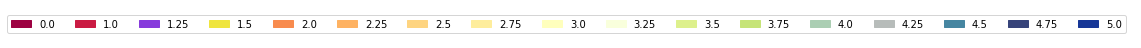

In [27]:
path = '../plots/figures/'
leg_name = '{}_legend.png'.format(theNotebook)
legend.savefig(os.path.join(path, leg_name)) 
legend

In [30]:
pw_latex(selected_genes_ids)

querying 1-50...done. [ from cache ]
querying 0/245
querying 50/245
querying 100/245
querying 150/245
querying 200/245
collected the 50 most enriched pathways
The top 50 most enriched pathways based on these genes are:\\
\begin{tabular}{llr}
\toprule
{} &                                               name &   p\_value \\
\midrule
0  &           p38 signaling mediated by MAPKAP kinases &  0.001185 \\
1  &                        Striated Muscle Contraction &  0.003285 \\
2  &                        Striated Muscle Contraction &  0.003864 \\
3  &      Aromatic L-Aminoacid Decarboxylase Deficiency &  0.009707 \\
4  &                    Tyrosine hydroxylase deficiency &  0.009707 \\
5  &                         Catecholamine Biosynthesis &  0.009707 \\
6  &                         catecholamine biosynthesis &  0.009707 \\
7  &                         Catecholamine biosynthesis &  0.009707 \\
8  &       Amphetamine addiction - Homo sapiens (human) &  0.011952 \\
9  &                         